In [1]:
import numpy as np
import random
import multiprocessing as mproc
import matplotlib.pyplot as plt
import tqdm
from tqdm.notebook import tqdm as tqdm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
import pandas as pd

import model_opt
import algo_GD
import helper

In [2]:
w_init = np.array([3,3])
_t_max = 3000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []
for i in tqdm(range(100)):
    var = np.random.randint(1,300,1)[0]
    noise = helper.gauss
    f = model_opt.RosenBrock(noise=noise,var=var)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        algo.update(model=f)
        
    iqr_store.append(helper.iqr(algo.noise_store))
    last_w_store.append(algo.w)

/Users/naoki/ML/GD/model_opt.py:373: RuntimeWarning: overflow encountered in double_scalars
  tmp[i] = 100 * (-4) * w[i] * (w[i+1] - w[i] ** 2) + 2 * (w[i] - 1)
/Users/naoki/ML/GD/model_opt.py:375: RuntimeWarning: overflow encountered in double_scalars
  tmp[i] = 100 * 2 * (w[i] - w[i-1] ** 2)
/Users/naoki/ML/GD/model_opt.py:373: RuntimeWarning: invalid value encountered in double_scalars
  tmp[i] = 100 * (-4) * w[i] * (w[i+1] - w[i] ** 2) + 2 * (w[i] - 1)
/Users/naoki/ML/GD/model_opt.py:375: RuntimeWarning: invalid value encountered in double_scalars
  tmp[i] = 100 * 2 * (w[i] - w[i-1] ** 2)


In [4]:
iqr_store

[16.38834025276079,
 69.57222690751193,
 250.178844959149,
 339.9360555372923,
 352.1624589865812,
 134.85146822509546,
 291.2518035010092,
 40.21029254232772,
 87.93048978748152,
 368.9228358683007,
 285.96367134513184,
 343.96021988082975,
 90.97930507066542,
 32.508771247999604,
 159.99079829918867,
 242.24421924690034,
 122.261363083994,
 232.12272769340336,
 83.94102139901995,
 238.40418064226628,
 195.5793643747192,
 124.70121832061747,
 152.5949263384707,
 376.80043467844877,
 57.42416975619453,
 349.6410347761822,
 328.740179930934,
 82.94424917377616,
 275.01543183700363,
 352.68769706180535,
 240.6359618417965,
 357.9678409069595,
 217.63539891795173,
 250.47703109234382,
 311.1874605458615,
 44.7862235747159,
 223.79299974752644,
 281.26667337925505,
 136.6293959014143,
 27.96199403866389,
 1.353041831954294,
 390.94868100781645,
 307.69368403883016,
 246.18395989217987,
 248.9611869042435,
 133.84562179811294,
 147.0311304386195,
 152.15122679040235,
 76.22039767806504,
 28

In [5]:
np.histogram(iqr_store)

(array([11,  7, 11, 12,  5, 13, 12, 11, 12,  6]),
 array([  1.31434945,  42.4916598 ,  83.66897015, 124.8462805 ,
        166.02359084, 207.20090119, 248.37821154, 289.55552189,
        330.73283224, 371.91014259, 413.08745293]))

(array([2., 1., 0., 1., 0., 0., 4., 1., 0., 2., 1., 0., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 3., 0., 0., 0., 2., 0., 2., 1., 2., 0., 2., 3., 0.,
        1., 2., 2., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 4., 1., 3., 1., 4., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 2., 0., 0., 1., 1., 2., 1., 1., 0., 3., 0., 2., 3., 1., 1.,
        2., 2., 0., 0., 1., 2., 1., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([  1.31434945,   5.43208049,   9.54981152,  13.66754256,
         17.78527359,  21.90300463,  26.02073566,  30.1384667 ,
         34.25619773,  38.37392876,  42.4916598 ,  46.60939083,
         50.72712187,  54.8448529 ,  58.96258394,  63.08031497,
         67.19804601,  71.31577704,  75.43350808,  79.55123911,
         83.66897015,  87.78670118,  91.90443222,  96.02216325,
        100.13989429, 104.25762532, 108.37535636, 112.49308739,
        116.61081843, 120.72854946, 124.8462805 , 128.96401153,
        133.08174257, 137.1994736 , 14

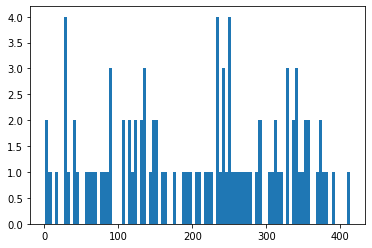

In [6]:
plt.hist(iqr_store,bins=100)

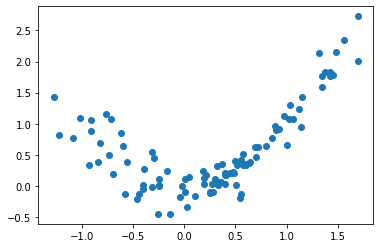

In [7]:
plt.scatter(*np.array(last_w_store).T)

In [8]:
s = np.where(np.array(iqr_store) < 50)

In [9]:
np.array(last_w_store)[s[0]]

array([[0.48975919, 0.21537275],
       [0.19190803, 0.02370073],
       [0.85617352, 0.764229  ],
       [0.60827339, 0.34663604],
       [0.41229726, 0.17006169],
       [0.44849914, 0.19966714],
       [0.63635738, 0.37100735],
       [0.60463963, 0.32939085],
       [0.5766885 , 0.33133514],
       [0.45713454, 0.20444051],
       [1.0190858 , 1.06970946],
       [0.70474668, 0.46708322]])

In [10]:
helper.get_index_bins(np.array(iqr_store),300,0)

array([ 0,  1,  2,  5,  6,  7,  8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 24, 27, 28, 30, 32, 33, 35, 36, 37, 38, 39, 40, 43, 44, 45,
       46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 65, 68,
       69, 70, 71, 72, 74, 75, 78, 79, 84, 85, 86, 87, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])

In [11]:
np.max(iqr_store)-np.min(iqr_store) 

411.77310348226604

In [12]:
np.linspace(np.min(iqr_store),np.max(iqr_store),10)

array([  1.31434945,  47.0669165 ,  92.81948356, 138.57205061,
       184.32461767, 230.07718472, 275.82975177, 321.58231883,
       367.33488588, 413.08745293])

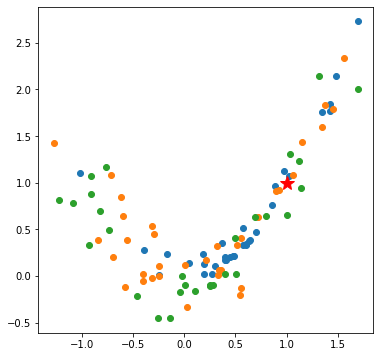

In [13]:
k = 4
fig, axes = plt.subplots(1,1, figsize=(6,6))
for i in range(k-1):
    c = np.linspace(np.min(iqr_store),np.max(iqr_store),k)
    index = helper.get_index_bins(np.array(iqr_store),c[i+1],c[i])
    plt.scatter(*np.array(last_w_store)[index].T)
plt.plot(*w_star, 'r*', markersize=14)

In [14]:
last_w_store = np.array(last_w_store)
last_w_store[0,:].shape

(2,)

In [15]:
import datetime
dt_now = datetime.datetime.now()

data = np.array([iqr_store,last_w_store[:,0],last_w_store[:,1]]).T
df = pd.DataFrame(data=data, columns=['iqr', 'w_0', 'w_1'])



In [16]:
df.to_csv('exp_result/gauss_noise_last_w  {}.csv'.format(dt_now),header=True)